In [21]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
import pickle
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
from matplotlib.colors import LogNorm
from astropy import units as u, constants  as c

pc = c.pc.cgs.value
kB  = c.k_B.cgs.value
Msun = c.M_sun.cgs.value
G = c.G.cgs.value
Myr = u.Myr.in_units("s")
mp = c.m_p.cgs.value

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble" : r'\boldmath'
})

def _own_mollweide_contours(hp_map, hp_con, nside, \
                            cmap="RdYlBu_r", vmin=None, vmax=None, \
                            Nlevel=None, con_level=None, con_color="k", con_lw=1, \
                            cbar_label="", fname=None, logscale=False, cbar_hor=False,\
                            tl_info="", tr_info=""):
    # get all ang values of hp_map
    Npix = hp.nside2npix(nside)
    theta, phi = hp.pix2ang(nside=64, ipix=np.arange(Npix))#,lonlat=True)

    # transform coordinates
    p2 = -(phi+np.pi)%(2*np.pi)-np.pi
    t2 = -(theta-np.pi/2.)

    #print(np.min(theta), np.max(theta))
    #print(np.min(phi), np.max(phi))

    # good number to interpolate:
    # Nx * Ny \approx Npix
    # Nx = 2*Ny
    # -> 2*Ny^2 = Npix
    # Ny = np.sqrt(Npix/2)

    fig, ax = plt.subplots(figsize=(8*0.8, 4*0.8), subplot_kw={'projection': 'mollweide'})
    
    Ny = 3* int(np.sqrt(Npix/2))
    Nx = 2*Ny
    print("Nx, Ny = ", Nx, Ny)
    # map healpix map of background to uniform data grid
    ra = np.linspace(-np.pi, np.pi, Nx)  # Right Ascension (longitude)
    dec = np.linspace(-np.pi/2, np.pi/2, Ny)  # Declination (latitude)
    X, Y = np.meshgrid(ra, dec)
    gridval = griddata((p2,t2), hp_map, (X,Y), method="linear")


    if logscale:
        im = ax.pcolormesh(X,Y,gridval, cmap=cmap, norm=LogNorm(vmin=vmin, vmax=vmax), zorder=-1)
    else:
        im = ax.pcolormesh(X,Y,gridval, cmap=cmap, vmin=vmin, vmax=vmax, zorder=-1)

    if hp_con is not None:
        if Nlevel is not None:
            ax.tricontour(p2, t2, hp_con, levels=Nlevel, linewidths=con_lw, colors=con_color)
        if con_level is not None:
            ax.tricontour(p2, t2, hp_con, levels=con_level, linewidths=con_lw, colors=con_color)        
    ax.grid(ls=":",color="k")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_rasterization_zorder(0)
    if cbar_hor:
        cbar = plt.colorbar(im,label=cbar_label, shrink=0.7, orientation="horizontal", \
                            pad=0.02, aspect=30)
    else:
        cbar = plt.colorbar(im,label=cbar_label, shrink=0.7)
        
    if tl_info != "":
        ax.text(0.0, 0.95, tl_info, transform=ax.transAxes, ha="left", \
                        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round', alpha=1.0))
    if tr_info != "":
        ax.text(1.0, 0.95, tr_info, transform=ax.transAxes, ha="right", \
                        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round', alpha=1.0))
    if fname is not None:
        print("storing file as", fname)
        fig.savefig(fname, bbox_inches="tight")


dict_keys(['simtime', 'simtime_Myr', 'coldens', 'coldens2', 'Xraylum', 'Xrayflx', 'Xraylum_hot', 'Xrayflx_hot', 'Xraylum_fixn', 'Xrayflx_fixn', 'Xraylum_hfn', 'Xrayflx_hfn', 'emmeasure', 'radius', 'bubble_open', 'EM_hot', 'Tmw', 'Tlw', 'Tew', 'radius_max', 'total_mass', 'total_lumi', 'total_flux', 'total_volu'])
Nx, Ny =  936 468
storing file as plots/Mollweide-new2/illustration-coldens/SILCC_hdf5_plt_cnt_1140-r0150-c000167-Tmw.pdf
Nx, Ny =  936 468
storing file as plots/Mollweide-new2/illustration-coldens/SILCC_hdf5_plt_cnt_1140-r0150-c000167-Tlw.pdf
Nx, Ny =  936 468
storing file as plots/Mollweide-new2/illustration-coldens/SILCC_hdf5_plt_cnt_1140-r0150-c000167-Tew.pdf


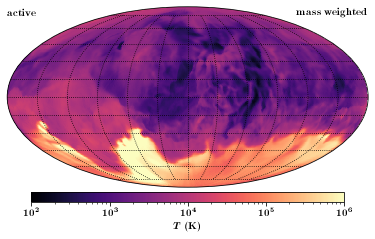

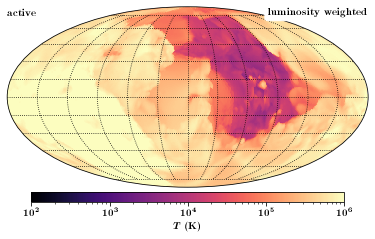

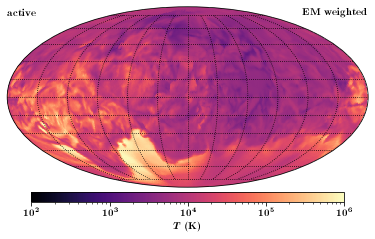

In [20]:
# open fiducial time snapshot and generate Mollweide projections

Nside=64
Npix = hp.nside2npix(Nside)
# loop over coldens files
#for cd in ["c000050", "c000100", "c000167", "c000500", "c001000", "c001670"]:
#for cd in ["c000050", "c001670"]:
for cd in ["c000167"]:
    fbase = 'SILCC_hdf5_plt_cnt_1140-r0150-'+cd
    with open('datafiles/2025-02-25-Mollweide/data-2025-02/'+fbase+'-data.pkl', 'rb') as handle:
        dat = pickle.load(handle)
    print(dat.keys())
    #hp.mollview(np.log10(dat["coldens2"]), return_projected_map=True, min=-6, max=-2)
    if False:
        print("mean, median EM: ", np.mean(dat["emmeasure"]), np.median(dat["emmeasure"]))
        projview(
                dat["emmeasure"],
                title="",
                cmap="afmhot",
                norm="log",
                llabel=r"",
                rlabel=r"",
                unit=r"emission measure (cm$^{-6}$ pc)",
                cbar_ticks=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
                #cbar_ticklabels=["$-3000$", "$-300$", "$0$", "$300$", "$3000$"],
                remove_mono=False,
                show_tickmarkers=True,
                #sub=121,
                override_plot_properties={"cbar_tick_direction": "in"},
                #norm_dict={"linscale": 0.1},
            );
        plt.savefig("plots/Mollweide-new/illustration-coldens/"+fbase+'-EM.pdf', bbox_inches="tight")

        projview(
                dat["Xrayflx"],
                title="",
                cmap="magma",
                norm="log",
                llabel=r"",
                rlabel=r"",
                unit=r"X ray flux (erg s$^{-1}$ sr$^{-1}$)",
                cbar_ticks=[1e16, 1e18, 1e20, 1e22, 1e24, 1e26, 1e28],
                #cbar_ticklabels=["$-3000$", "$-300$", "$0$", "$300$", "$3000$"],
                remove_mono=False,
                show_tickmarkers=True,
                #sub=121,
                override_plot_properties={"cbar_tick_direction": "in"},
                #norm_dict={"linscale": 0.1},
            );
        plt.savefig("plots/Mollweide-new/illustration-coldens/"+fbase+'-Xrayflx.pdf', bbox_inches="tight")
        
        projview(
                dat["coldens"],
                title="",
                cmap="RdYlBu_r",
                norm="log",
                llabel=r"",
                rlabel=r"",
                unit=r"column density (g cm$^{-2}$)",
                cbar_ticks=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
                #cbar_ticklabels=["$-3000$", "$-300$", "$0$", "$300$", "$3000$"],
                remove_mono=False,
                show_tickmarkers=True,
                #sub=121,
                override_plot_properties={"cbar_tick_direction": "in"},
                #norm_dict={"linscale": 0.1},
            );
        
        #theta, phi = hp.pix2ang(nside=Nside, ipix=np.arange(Npix))
        #print(theta.shape)
        #print(phi.shape)
        #print(dat["coldens"].shape)
        #break
        #m = hp.mollview(dat["coldens"], return_projected_map=True)
        #hp.projaxes.MollweideAxes.tricontour(phi,theta,dat["coldens"], 10, colors='k', linewidths=0.5)
        #ra = np.linspace(-np.pi, np.pi, 40)  # Right Ascension (longitude)
        #dec = np.linspace(-np.pi / 2, np.pi / 2, 20)  # Declination (latitude)
        #X, Y = np.meshgrid(ra, dec)
        #Z = np.sin(X) * np.cos(X) * np.sin(Y) * np.cos(Y)
        #print(Z.shape)

        #hp.projaxes.MollweideAxes.contour(Z, 10, colors='k', linewidths=0.5)
        #ax = plt.gca()
        #contours = ax.contour(m, levels=levels, colors='white', alpha=0.5)
        #plt.clabel(contours, inline=True, fontsize=8)
        #plt.show()
        #break
        
        plt.savefig("plots/Mollweide-new/illustration-coldens/"+fbase+'-coldens.pdf', bbox_inches="tight")
        projview(
                dat["coldens2"],
                title="",
                cmap="RdYlBu_r",
                norm="log",
                llabel=r"",
                rlabel=r"",
                unit=r"column density (g cm$^{-2}$)",
                cbar_ticks=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
                #cbar_ticklabels=["$-3000$", "$-300$", "$0$", "$300$", "$3000$"],
                remove_mono=False,
                show_tickmarkers=True,
                #sub=121,
                override_plot_properties={"cbar_tick_direction": "in"},
                #norm_dict={"linscale": 0.1},
            );
        plt.savefig("plots/Mollweide-new/illustration-coldens/"+fbase+'-coldens-full.pdf', bbox_inches="tight")
        projview(
                dat["radius"],
                title="",
                cmap="bone",
                norm="linear",
                llabel=r"",
                rlabel=r"",
                unit=r"radius (pc)",
                cbar_ticks=[20,40,60,80,100,120,140],
                #cbar_ticklabels=["$-3000$", "$-300$", "$0$", "$300$", "$3000$"],
                remove_mono=False,
                show_tickmarkers=True,
                #sub=121,
                override_plot_properties={"cbar_tick_direction": "in"},
                #norm_dict={"linscale": 0.1},
            );
        plt.savefig("plots/Mollweide-new/illustration-coldens/"+fbase+'-radius.pdf', bbox_inches="tight")
        projview(
                dat["bubble_open"],
                title="",
                cmap="coolwarm",
                norm="linear",
                llabel=r"",
                rlabel=r"",
                unit=r"open fraction",
                cbar_ticks=[0,1],
                #cbar_ticklabels=["$-3000$", "$-300$", "$0$", "$300$", "$3000$"],
                remove_mono=False,
                show_tickmarkers=True,
                #sub=121,
                override_plot_properties={"cbar_tick_direction": "in"},
                #norm_dict={"linscale": 0.1},
            );
        plt.savefig("plots/Mollweide-new/illustration-coldens/"+fbase+'-fraction-open.pdf', bbox_inches="tight")


    if False:
        _own_mollweide_contours(dat["coldens2"]/mp, dat["bubble_open"], 64, con_level=[0.5], \
                        con_color="k",cbar_label="\\textbf{column density }$\\mathrm{(cm^{-2})}$", \
                                vmin=1e19, vmax=1e22, cbar_hor=True, logscale=True, \
                               fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-coldens.pdf')
        _own_mollweide_contours(dat["radius"], dat["bubble_open"], 64, con_level=[0.5], cmap="bone", \
                        con_color="red",cbar_label="\\textbf{radius (pc)}", logscale=False, vmin=20, vmax=140,\
                               cbar_hor=True,\
                               fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-radius.pdf')

        _own_mollweide_contours(dat["Xraylum"], None, 64, cmap="plasma", \
                        cbar_label="$L_X~\\mathrm{(erg~s^{-1})}$", \
                        vmin=1e20, vmax=1e32, cbar_hor=True, logscale=True, \
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-Xraylum.pdf')
        _own_mollweide_contours(dat["Xrayflx"], None, 64, cmap="magma", \
                        cbar_label="$F_X~\\mathrm{(erg~s^{-1}~sr^{-1})}$", logscale=True, vmin=1e16, vmax=1e28,\
                        cbar_hor=True,\
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-Xrayflx.pdf')

    if False:
        EMmin = 1e-9
        EMmax = 1
        _own_mollweide_contours(dat["emmeasure"], None, 64, cmap="afmhot", \
                        cbar_label="$\\mathrm{EM}~\\mathrm{(cm^{-6}~pc)}$", logscale=True, \
                        vmin=EMmin, vmax=EMmax,\
                        cbar_hor=True,\
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-EM.pdf')
        _own_mollweide_contours(dat["EM_hot"], None, 64, cmap="afmhot", \
                        cbar_label="$\\mathrm{EM}~\\mathrm{(cm^{-6}~pc)}$", logscale=True, \
                        vmin=EMmin, vmax=EMmax,\
                        cbar_hor=True,\
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-EMhot.pdf')

    if False:
        _own_mollweide_contours(dat["Xrayflx"], None, 64, cmap="magma", \
                        cbar_label="$F_X~\\mathrm{(erg~s^{-1}~sr^{-1})}$", logscale=True, vmin=1e16, vmax=1e28,\
                        cbar_hor=True,\
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-Xrayflx.pdf')
        _own_mollweide_contours(dat["Xrayflx_hot"], None, 64, cmap="magma", \
                        cbar_label="$F_X~\\mathrm{(erg~s^{-1}~sr^{-1})}$", logscale=True, vmin=1e16, vmax=1e28,\
                        cbar_hor=True,\
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-Xrayflx-hot.pdf')
        _own_mollweide_contours(dat["Xrayflx_fixn"], None, 64, cmap="magma", \
                        cbar_label="$F_X~\\mathrm{(erg~s^{-1}~sr^{-1})}$", logscale=True, vmin=1e16, vmax=1e28,\
                        cbar_hor=True,\
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-Xrayflx-fixn.pdf')
        _own_mollweide_contours(dat["Xrayflx_hfn"], None, 64, cmap="magma", \
                        cbar_label="$F_X~\\mathrm{(erg~s^{-1}~sr^{-1})}$", logscale=True, vmin=1e16, vmax=1e28,\
                        cbar_hor=True,\
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-Xrayflx-hfn.pdf')

    if True:
        Tmin = 1e2
        Tmax = 1e6
        _own_mollweide_contours(dat["Tmw"], None, 64, cmap="magma", \
                        cbar_label="$T~\\mathrm{(K)}$", logscale=True, vmin=Tmin, vmax=Tmax,\
                        cbar_hor=True, tl_info="\\textbf{active state}", tr_info="\\textbf{mass weighted}", \
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-Tmw.pdf')
        _own_mollweide_contours(dat["Tlw"], None, 64, cmap="magma", \
                        cbar_label="$T~\\mathrm{(K)}$", logscale=True, vmin=Tmin, vmax=Tmax,\
                        cbar_hor=True, tl_info="\\textbf{active state}", tr_info="\\textbf{luminosity weighted}", \
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-Tlw.pdf')
        _own_mollweide_contours(dat["Tew"], None, 64, cmap="magma", \
                        cbar_label="$T~\\mathrm{(K)}$", logscale=True, vmin=Tmin, vmax=Tmax,\
                        cbar_hor=True, tl_info="\\textbf{active state}", tr_info="\\textbf{EM weighted}", \
                        fname="plots/Mollweide-new2/illustration-coldens/"+fbase+'-Tew.pdf')


dict_keys(['simtime', 'simtime_Myr', 'coldens', 'coldens2', 'Xraylum', 'Xrayflx', 'Xraylum_hot', 'Xrayflx_hot', 'Xraylum_fixn', 'Xrayflx_fixn', 'Xraylum_hfn', 'Xrayflx_hfn', 'emmeasure', 'radius', 'bubble_open', 'EM_hot', 'Tmw', 'Tlw', 'Tew', 'radius_max', 'total_mass', 'total_lumi', 'total_flux', 'total_volu'])
Nx, Ny =  936 468
storing file as plots/Mollweide-new2/comp/SILCC_hdf5_plt_cnt_1080-r0150-c000167-Xrayflx.pdf
Nx, Ny =  936 468
storing file as plots/Mollweide-new2/comp/SILCC_hdf5_plt_cnt_1080-r0150-c000167-Xrayflx-hot.pdf
Nx, Ny =  936 468
storing file as plots/Mollweide-new2/comp/SILCC_hdf5_plt_cnt_1080-r0150-c000167-Xrayflx-fixn.pdf
Nx, Ny =  936 468
storing file as plots/Mollweide-new2/comp/SILCC_hdf5_plt_cnt_1080-r0150-c000167-Xrayflx-hfn.pdf
dict_keys(['simtime', 'simtime_Myr', 'coldens', 'coldens2', 'Xraylum', 'Xrayflx', 'Xraylum_hot', 'Xrayflx_hot', 'Xraylum_fixn', 'Xrayflx_fixn', 'Xraylum_hfn', 'Xrayflx_hfn', 'emmeasure', 'radius', 'bubble_open', 'EM_hot', 'Tmw', 'Tlw

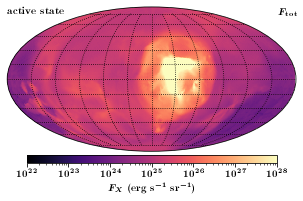

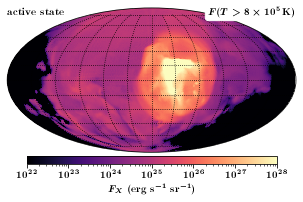

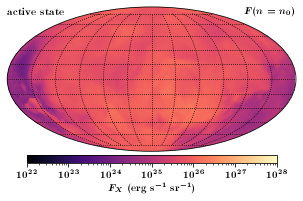

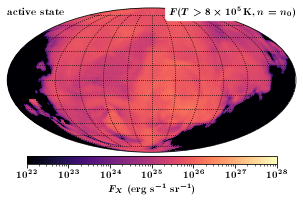

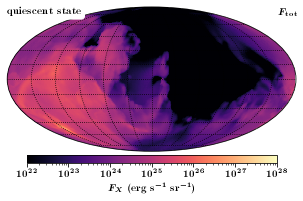

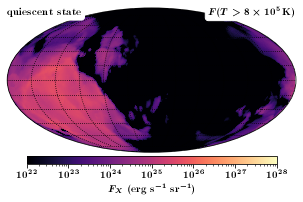

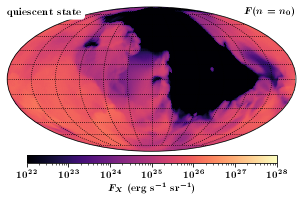

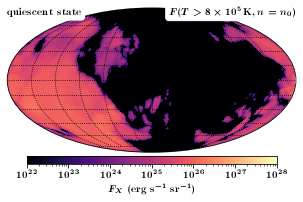

In [28]:
# new loop with only the plots I need

# open fiducial time snapshot and generate Mollweide projections

Nside=64
Npix = hp.nside2npix(Nside)
# loop over coldens files
#for cd in ["c000050", "c000100", "c000167", "c000500", "c001000", "c001670"]:
#for cd in ["c000050", "c001670"]:
files = ['SILCC_hdf5_plt_cnt_1080', 'SILCC_hdf5_plt_cnt_1140']
labels = ["\\textbf{active state}", "\\textbf{quiescent state}"]
for cd in ["c000167"]:
    for i, f, label in zip(range(len(files)), files, labels):
        fbase = f+'-r0150-'+cd
        with open('datafiles/2025-02-25-Mollweide/data-2025-02/'+fbase+'-data.pkl', 'rb') as handle:
            dat = pickle.load(handle)
        print(dat.keys())
        
        if False:
            Tmin = 1e2
            Tmax = 1e6
            _own_mollweide_contours(dat["Tmw"], None, 64, cmap="magma", \
                            cbar_label="$T~\\mathrm{(K)}$", logscale=True, vmin=Tmin, vmax=Tmax,\
                            cbar_hor=True, tl_info=label, tr_info="\\textbf{mass weighted}", \
                            fname="plots/Mollweide-new2/comp/"+fbase+'-Tmw.pdf')
            _own_mollweide_contours(dat["Tlw"], None, 64, cmap="magma", \
                            cbar_label="$T~\\mathrm{(K)}$", logscale=True, vmin=Tmin, vmax=Tmax,\
                            cbar_hor=True, tl_info=label, tr_info="\\textbf{luminosity weighted}", \
                            fname="plots/Mollweide-new2/comp/"+fbase+'-Tlw.pdf')
            _own_mollweide_contours(dat["Tew"], None, 64, cmap="magma", \
                            cbar_label="$T~\\mathrm{(K)}$", logscale=True, vmin=Tmin, vmax=Tmax,\
                            cbar_hor=True, tl_info=label, tr_info="\\textbf{EM weighted}", \
                            fname="plots/Mollweide-new2/comp/"+fbase+'-Tew.pdf')

            EMmin = 1e-7
            EMmax = 10
            _own_mollweide_contours(dat["emmeasure"], None, 64, cmap="afmhot", \
                            cbar_label="$\\mathrm{EM}~\\mathrm{(cm^{-6}~pc)}$", logscale=True, \
                            vmin=EMmin, vmax=EMmax,\
                            cbar_hor=True, tl_info=label, tr_info="\\textbf{all EM}",\
                            fname="plots/Mollweide-new2/comp/"+fbase+'-EM.pdf')
            _own_mollweide_contours(dat["EM_hot"], None, 64, cmap="afmhot", \
                            cbar_label="$\\mathrm{EM}~\\mathrm{(cm^{-6}~pc)}$", logscale=True, \
                            vmin=EMmin, vmax=EMmax,\
                            cbar_hor=True, tl_info=label, tr_info="\\textbf{EM }$T>8\\times10^5\\,\\mathrm{K}$",\
                            fname="plots/Mollweide-new2/comp/"+fbase+'-EMhot.pdf')

        if False:
            Fmin = 1e22
            Fmax = 1e28
            _own_mollweide_contours(dat["Xrayflx"], None, 64, cmap="magma", \
                            cbar_label="$F_X~\\mathrm{(erg~s^{-1}~sr^{-1})}$", logscale=True, vmin=Fmin, vmax=Fmax,\
                            cbar_hor=True, tl_info=label, tr_info="$F_\\mathrm{tot}$",\
                            fname="plots/Mollweide-new2/comp/"+fbase+'-Xrayflx.pdf')
            _own_mollweide_contours(dat["Xrayflx_hot"], None, 64, cmap="magma", \
                            cbar_label="$F_X~\\mathrm{(erg~s^{-1}~sr^{-1})}$", logscale=True, vmin=Fmin, vmax=Fmax,\
                            cbar_hor=True, tl_info=label, tr_info="$F(T>8\\times10^5\\,\\mathrm{K})$",\
                            fname="plots/Mollweide-new2/comp/"+fbase+'-Xrayflx-hot.pdf')
            _own_mollweide_contours(dat["Xrayflx_fixn"], None, 64, cmap="magma", \
                            cbar_label="$F_X~\\mathrm{(erg~s^{-1}~sr^{-1})}$", logscale=True, vmin=Fmin, vmax=Fmax,\
                            cbar_hor=True, tl_info=label, tr_info="$F(n=n_0)$",\
                            fname="plots/Mollweide-new2/comp/"+fbase+'-Xrayflx-fixn.pdf')
            _own_mollweide_contours(dat["Xrayflx_hfn"], None, 64, cmap="magma", \
                            cbar_label="$F_X~\\mathrm{(erg~s^{-1}~sr^{-1})}$", logscale=True, vmin=Fmin, vmax=Fmax,\
                            cbar_hor=True, tl_info=label, tr_info="$F(T>8\\times10^5\\,\\mathrm{K},n=n_0)$",\
                            fname="plots/Mollweide-new2/comp/"+fbase+'-Xrayflx-hfn.pdf')
